<a href="https://colab.research.google.com/github/santiagorc99/MyS-2020-2/blob/main/euler_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Santiago Rincón Carreño - 0816052
# Modelado y Simulación
### Forward Euler Method
Es un método numérico para resolver ecuaciones diferenciales, es un método iterativo explícito, por lo que para conocer un estimado en un paso, simplemente es necesario conocer valor del punto en el paso actual.

Dada una ecuación del tipo
$$\dot{x}=\frac{dx}{dt}=f(y)$$ con condiciones iniciales iniciales $x(t_0) = x_0$. 

Se toma un punto en el tiempo de la forma $t_1=t_0+\Delta t$. Luego, el cambio en $x$ está dado por $\Delta x = f(x_0) \Delta t$ y $x(t_0+\Delta t) = x_0 + f(x_0)\Delta t$ es válido si y solo si $\Delta t\xrightarrow [  ]{  } 0 $. Se toma un punto $x_1 = x_0 + f(x_0) \Delta t$. Se realiza un proceso iterativo de manera que:
$$x_{i+1} = x_i + hf(x_i)$$
Donde $h = \Delta t$ es un tamaño de paso definido por el usuario, entre más pequeño el tamaño de paso, más acertada la aproximación de $x_i$.

Este método se puede generalizar para un sistema de n ecuaciones así:
$$\mathbf{x}_{i+1} = \mathbf{x}_i + h  f(\mathbf{x}_i)$$

Donde todos los anteriores vectores son vectores columnas y constituyen un sistema de ecuaciones diferenciales n-dimensional.

**Ejemplo**: Se tiene la ecuación diferencial $\dot x = -ax$ para todo $a>0$, hallar la estimación de $x$ por método de euler y calcular el error absoluto promedio con respecto a la solución analítica.

**Solución** La solución analítica está dada por $x=e^{-at}$, para todo $a>0$. A continuación se realiza un pequeño código para aplicar el método.

El error absoluto promedio es  1.2676506002282294e+28  .



[]

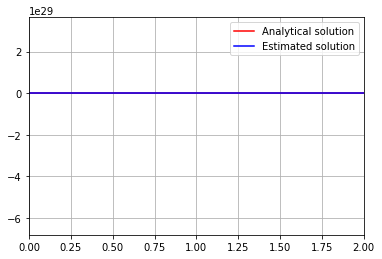

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def custom_f1(x):
    return -3*x

def forward_euler_1D(x0, h, N):
    dimension = x.shape[0]

    x_estimated = np.zeros([dimension, N])
    x_estimated[:,0] = x0
    
    for i in range(1, N):
        current_x = x_estimated[:,i-1]
        current_f = custom_f1(current_x)
        next_x = current_x + h*current_f
        x_estimated[:,i] = next_x

    return x_estimated


x0 = 1
h = 1
N = 100

t = np.linspace(0,h*N, N) 

x_real = np.exp(-3*t)
x_estimated = forward_euler_1D(x0, h, N)

absolute_error = sum(abs(x_real-x_estimated[0,:]))/N
print("El error absoluto promedio es ",absolute_error, " .\n")

plt.plot(t, x_real, 'r')
plt.plot(t, x_estimated[0,:], 'b')
plt.xlim([0,2])
plt.legend(['Analytical solution','Estimated solution'])
plt.grid()
plt.plot()

### Backward Euler Method
Es un método numérico utilizado para resolver ecuaciones diferenciales, es un método iterativo implícito, por lo que para hallar un estimado en el siguiente paso, es necesario conocer el valor actual del estimado y también tiene en cuenta la dependendencia con la función en el valor estimado.

Se parte de la definición matemática de la derivada:
$$\dot { x(t) } =\lim _{ h\xrightarrow [  ]{  } 0 }{ \frac { x(t)-x(t-h) }{ h }  }$$ 
Luego, 
$$\dot{x(t)} \approx \frac { x(t)-x(t-h) }{ h }$$
Se parte desde un punto inicial $x_0=x(t_0)$, si se asume que hay un paso $t_1 = t_0 + \Delta t$, se tiene:
$$f(x(t_1)) = \frac { x(t_1)-x(0)) }{ h }$$
Finalmente, despejando para $x_1$ se tiene que:
$$x_1 = x_0 + hf(x_1)$$
Donde h es un tamaño de paso definido por el usuario, luego, se hace el proceso itarativamente y se obtiene que:
$$x_{i+1} = x_i + hf(x_{i+1})$$
Finalmente, para hallar $x_{i+1}$ es necesario resolver la anterior ecuación.

**Ejemplo** Considérese el anterior problema $\dot x = -ax$, hallar el estimado con backward euler y hallar el error absoluto promedio.

**Solución**: 
* La solución analítica está dada por $x=e^{-at}$, para todo $a>0$. A continuación se realiza un pequeño código para aplicar el método.
* Se halla de manera analíca el valor estimado $x_{i+1}$ así:
$$x_{i+1} = x_i + hf(x_{i+1})$$
$$x_{i+1} = x_i - ahx_{i+1}$$
$$x_{i+1} = \frac{x_i}{1+ah}$$

Como es un proceso iterativo, se puede generalizar a que:
$$x_{i+1} = \frac{x_0}{(1+ah)^{i+1}}$$

El error absoluto promedio es  0.0008332789047757014  .



[]

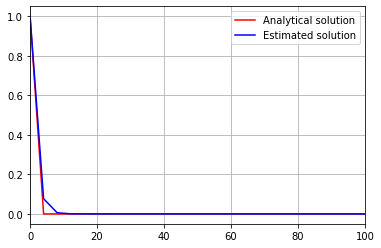

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def find_estimated1(x_old, h):
    return x_old/(1+3*h)

def forward_euler_1D(x0, h, N):
    dimension = x.shape[0]

    x_estimated = np.zeros([dimension, N])
    x_estimated[:,0] = x0
    
    for i in range(1, N):
        current_x = x_estimated[:,i-1]
        next_x = find_estimated1(current_x, h)
        x_estimated[:,i] = next_x

    return x_estimated


x0 = 1
h = 4
N = 100

t = np.linspace(0,h*N, N) 

x_real = np.exp(-3*t)
x_estimated = forward_euler_1D(x0, h, N)

absolute_error = sum(abs(x_real-x_estimated[0,:]))/N
print("El error absoluto promedio es ",absolute_error, " .\n")

plt.plot(t, x_real, 'r')
plt.plot(t, x_estimated[0,:], 'b')
plt.xlim([0,100])
plt.legend(['Analytical solution','Estimated solution'])
plt.grid()
plt.plot()



Considérese cualquier función $f(x)$ de clase $C^1$, es decir, que tiene hasta segunda derivada. Dicha función puede representarse por series de taylor de la forma
$$f_{(x)}=f_{(x_0)}+f'_{(x_0)}(x-x_0) $$

De manera general, se puede representar una función $f(x)$ de la forma
$$f(x) = c_1 + c_2x $$
Donde $c_i$ para todo $i=\{1,2\}$ es un coeficiente constante.

Luego, $x_{i+1}$ se halla de la siguiente manera

$$x_{i+1} = x_{i} + h(c_1 + c_2x_{i+1})$$
$$(1-hc_2)x_{i+1} - (x_i+ hc_1) = 0$$

Finalmente
$$x_{i+1} = \frac{x_i+ hc_1}{1-hc_2}$$

Se pueden aumentar la cantidad de orden en la expansión de Taylor, pero por ahora simplemente se trabaja con términos de orden 1 por facilidad.

### Rigidez en las ODEs

Se dice que un sistema es rígido si la solución a su ecuación diferencial contiene componentes rápidas y otras lentas, por ejemplo:
$$x(t) = 2 + e^{-1000t} + e^{-0.1t}$$

Donde el término $e^{-1000t}$ decrece muy rápido y $e^{-0.1t}$ cae lentamente. En la resolución de ODEs rígidas se tiene el problema de escoger el parámetro h, ya que si es muy grande la información de la componente lenta se pierde (El método no converge) y si por el contrario es muy pequeño se tiene un costo computacional alto y un error de precisión de bits inducido por los computadores.

Por ello, los métodos explícitos tienen un alto riesgo de divergencia si la ODE es rígida o se h es muy grande. Por el contrario, los métodos implícitos inducen un término de convergencia a la estimación, disminuyendo el rioesgo de divergencia y además se puede utilizar un h grande sin temor a la inestabilidad. 

**Ejemplo** Considérese el problema desarrollado anteriormente $\dot x = -a x$ para $a>0$, las soluciones que se hallaron son:
* $x_{i+1} = x_{i} -ahx_{i} $, la cual presenta un problema de convergencia cuando h es muy grande.
* $x_{i+1} = \frac{x_{i}}{1+ah}$, esta solución garantiza la convergencia incluso si h es muy grande. Visto desde otro punto, ya que $(1+ah)>0$, se puede proponer lo siguiente:
$$\lim_{i -> \infty}{x_{i+1}} = \lim_{i -> \infty}{\frac{x_{i}}{1+ah}} = 
\lim_{i -> \infty}{\frac{x_i}{(1+ah)^{i+1}}} = 0 $$

In [ ]:
: